In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import sweetviz as sv
import pandas_profiling as pp
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Predicting Salary based on years of experience

In [73]:
df2 = pd.read_csv("C:\\Users\\krush\\Desktop\\Data Science\\Assignments\\Simple Linear Regression\\Salary_Data.csv")
df2

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA and Visualization

In [74]:
df2.rename(columns= {'YearsExperience' : 'Exp'}, inplace=True)
df2

,Exp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [75]:
df2.describe()

,Exp,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Exp     30 non-null     float64
 1   Salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


<AxesSubplot:xlabel='Exp', ylabel='Density'>

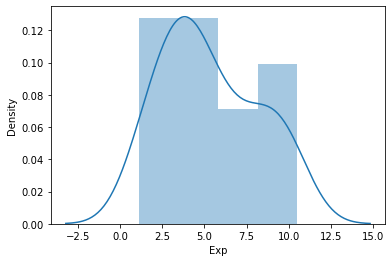

In [77]:
sns.distplot(df2['Exp'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

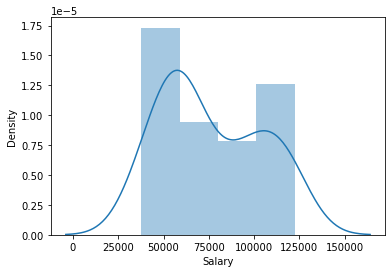

In [78]:
sns.distplot(df2['Salary'])

<AxesSubplot:xlabel='Exp', ylabel='Salary'>

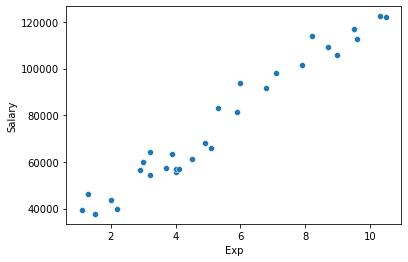

In [79]:
sns.scatterplot(df2['Exp'], df2['Salary'])

## Correlation Analysis

In [80]:
df2.corr()

,Exp,Salary
Exp,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

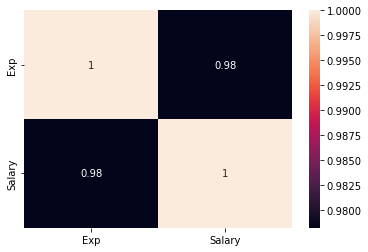

In [81]:
sns.heatmap(df2.corr(), annot = True)

<AxesSubplot:xlabel='Exp', ylabel='Salary'>

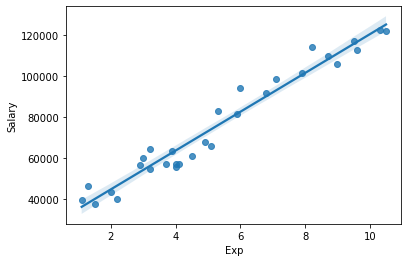

In [82]:
sns.regplot(df2['Exp'], df2['Salary'])

## Model 1 (Without Transformation)

In [83]:
import statsmodels.formula.api as smf

model1 = smf.ols('Salary~Exp', data = df2).fit()
model1

#### Model Testing

In [84]:
model1.params

Intercept    25792.200199
Exp           9449.962321
dtype: float64

In [85]:
model1.tvalues, model1.pvalues

(Intercept    11.346940
 Exp          24.950094
 dtype: float64,
 Intercept    5.511950e-12
 Exp          1.143068e-20
 dtype: float64)

In [86]:
print(model1.rsquared, model1.rsquared_adj)

0.9569566641435086 0.9554194021486339


In [87]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.14e-20
Time:                        11:36:31   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Exp         9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 2 (Exponential Transformation)

In [88]:
model2 = smf.ols('Salary~np.exp(Exp)', data = df2).fit()

In [89]:
model2.params

Intercept      67568.624969
np.exp(Exp)        2.136040
dtype: float64

In [90]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           2.72e-05
Time:                        11:36:34   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
np.exp(Exp)     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 3 (Square Transformation)

In [91]:
model3 = smf.ols('Salary~np.square(Exp)', data = df2).fit()

In [92]:
model3.params

Intercept         48042.585515
np.square(Exp)      776.318773
dtype: float64

In [93]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           1.52e-16
Time:                        11:36:37   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
np.square(Exp)   776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 4 (Square Root Transformation)

In [94]:
model4 = smf.ols('Salary~np.sqrt(Exp)', data = df2).fit()

In [95]:
model4.params

Intercept      -16055.769117
np.sqrt(Exp)    41500.680583
dtype: float64

In [96]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           8.57e-18
Time:                        11:36:41   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
np.sqrt(Exp)   4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 5 (Log of X Transformation)

In [97]:
model5 = smf.ols('Salary~np.log(Exp)', data = df2).fit()

In [98]:
model5.params

Intercept      14927.97177
np.log(Exp)    40581.98796
dtype: float64

In [99]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           3.25e-13
Time:                        11:36:43   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(Exp)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 6 (Log of Y Transformation)

In [100]:
model6 = smf.ols('np.log(Salary)~Exp', data = df2).fit()

In [101]:
model6.params

Intercept    10.507402
Exp           0.125453
dtype: float64

In [102]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           7.03e-18
Time:                        11:36:46   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5074      0.038    273.327      0.000      10.429      10.586
Exp            0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model 7 (Log of X and Y Transformation)

In [103]:
model7 = smf.ols('np.log(Salary)~np.log(Exp)', data = df2).fit()

In [104]:
model7.params

Intercept      10.328043
np.log(Exp)     0.562089
dtype: float64

In [105]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 12 Jan 2023   Prob (F-statistic):           7.40e-16
Time:                        11:36:48   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.3280      0.056    184.868      0.000      10.214      10.442
np.log(Exp)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion
From the above models, we find that Model no. 1 gives us the best results in terms of R-squared value = 95.7%.\
Hence we select that model and predict data based on it.

## Prediction of new data (Salary)

In [106]:
Years_Experience = pd.Series([0.5, 5.0, 12])
Years_Experience = pd.DataFrame(Years_Experience, columns=['Exp'])
Years_Experience

,Exp
0,0.5
1,5.0
2,12.0


In [109]:
Predicted_Salary = model1.predict(Years_Experience)
Predicted_Salary

0     30517.181359
1     73042.011806
2    139191.748056
dtype: float64

#### End